# 前期准备

In [3]:
# 导入包和数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

full = pd.read_csv(r'D:\pythonstudy\game1.csv')
pd.set_option('display.max_columns', 10)
print('full前五行：', full.head(5))
print(full.info())

full前五行：    user_id        register_time  wood_add_value  wood_reduce_value  \
0    14933  2018-03-08 20:27:57        166415.0           138362.0   
1    14934  2018-03-08 20:29:42         10000.0              600.0   
2    14935  2018-03-08 20:30:13         10000.0             3700.0   
3    14936  2018-03-08 20:31:41        210000.0                0.0   
4    14937  2018-03-08 20:32:07         11500.0             3700.0   

   stone_add_value  ...  pve_lanch_count  pve_win_count  avg_online_minutes  \
0                0  ...                1              1            8.000000   
1                0  ...                0              0            0.166667   
2                0  ...                0              0           17.000000   
3           200000  ...                0              0            1.666667   
4                0  ...                0              0            0.333333   

   pay_price  pay_count  
0        0.0          0  
1        0.0          0  
2        0.0     

In [2]:
# 检查重复值和缺失值
duplicate_row = full.duplicated(subset=['user_id'])  # 筛选出重复的user_id，结果是没有重复ID
print('duplicate_row:\n',duplicate_row.describe())
print(full.loc[duplicate_row, :].head(5))  # 筛选出重复的user_id的记录，结果是没有重复id（loc切片的方式）
print('full.isnull:', full.isnull().head(5))  # 检查null，结果是没有缺失值

duplicate_row:
 count     828934
unique         1
top        False
freq      828934
dtype: object
Empty DataFrame
Columns: [user_id, register_time, wood_add_value, wood_reduce_value, stone_add_value, stone_reduce_value, ivory_add_value, ivory_reduce_value, meat_add_value, meat_reduce_value, magic_add_value, magic_reduce_value, infantry_add_value, infantry_reduce_value, cavalry_add_value, cavalry_reduce_value, shaman_add_value, shaman_reduce_value, wound_infantry_add_value, wound_infantry_reduce_value, wound_cavalry_add_value, wound_cavalry_reduce_value, wound_shaman_add_value, wound_shaman_reduce_value, general_acceleration_add_value, general_acceleration_reduce_value, building_acceleration_add_value, building_acceleration_reduce_value, reaserch_acceleration_add_value, reaserch_acceleration_reduce_value, training_acceleration_add_value, training_acceleration_reduce_value, treatment_acceleraion_add_value, treatment_acceleration_reduce_value, bd_training_hut_level, bd_healing_lodge_level

# Acqusition

In [4]:
# 构造注册日期字段用于统计分析注册随时间的走势。
full['register_date'] = full['register_time'].astype('datetime64[ns]').dt.date  #.dt 是 Pandas 日期时间访问器；.date 是 .dt 访问器的一个属性
count_date = full.groupby(by='register_date').agg({'user_id': 'count'})  # 按注册日期统计注册人数
count_date = pd.Series(data=count_date['user_id'], index=count_date.index)
count_date.head(5)

register_date
2018-03-07     42050
2018-03-08     39826
2018-03-09     62117
2018-03-10    114035
2018-03-11     59038
Name: user_id, dtype: int64

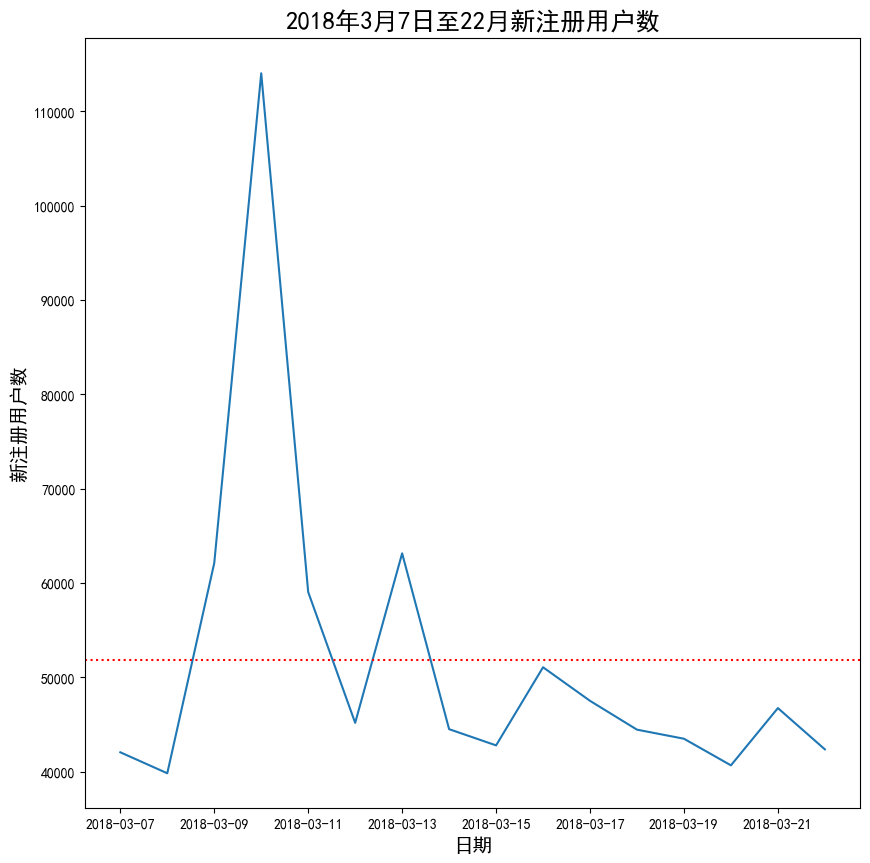

In [72]:
# 按注册日期统计新增用户数，使用柱状图显示。
fig = plt.figure(figsize=(10, 10))
count_date.plot(kind='line')
plt.axhline(y=count_date.mean(), label='平均值', color='red', linestyle=':')
plt.annotate(text='平均值', xy=(12,count_date.mean()), xytext=(12,count_date.mean()))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('日期',fontsize=14)
plt.ylabel('新注册用户数',fontsize=14)
plt.title('2018年3月7日至22月新注册用户数',fontsize=18)
plt.show()

# Activation and Retention

In [6]:
# 留存用户数
retention_count = (full['avg_online_minutes'] > 0).astype('int').sum()
retention_user = full.loc[full['avg_online_minutes'] > 0,:]
print('留存用户：',retention_user.head(5))
print('留存用户的7天在线时间的总计：', retention_user['avg_online_minutes'].sum(),'分钟')
print('留存用户的7天在线时间的平均值：', retention_user['avg_online_minutes'].mean(),'分钟')

留存用户：    user_id        register_time  wood_add_value  wood_reduce_value  \
0    14933  2018-03-08 20:27:57        166415.0           138362.0   
1    14934  2018-03-08 20:29:42         10000.0              600.0   
2    14935  2018-03-08 20:30:13         10000.0             3700.0   
3    14936  2018-03-08 20:31:41        210000.0                0.0   
4    14937  2018-03-08 20:32:07         11500.0             3700.0   

   stone_add_value  stone_reduce_value  ivory_add_value  ...  \
0                0                   0                0  ...   
1                0                   0                0  ...   
2                0                   0                0  ...   
3           200000                   0           200000  ...   
4                0                   0                0  ...   

   pve_battle_count  pve_lanch_count  pve_win_count  avg_online_minutes  \
0                 1                1              1            8.000000   
1                 0                0  

avg_online_minutes
(0.0, 1.0]      320116
(1.0, 5.0]      284623
(5.0, inf]      206782
(-0.01, 0.0]     17413
Name: count, dtype: int64
0至1分钟    320116
1至5分钟    284623
5分钟以上    206782
0分钟       17413
Name: count, dtype: int64


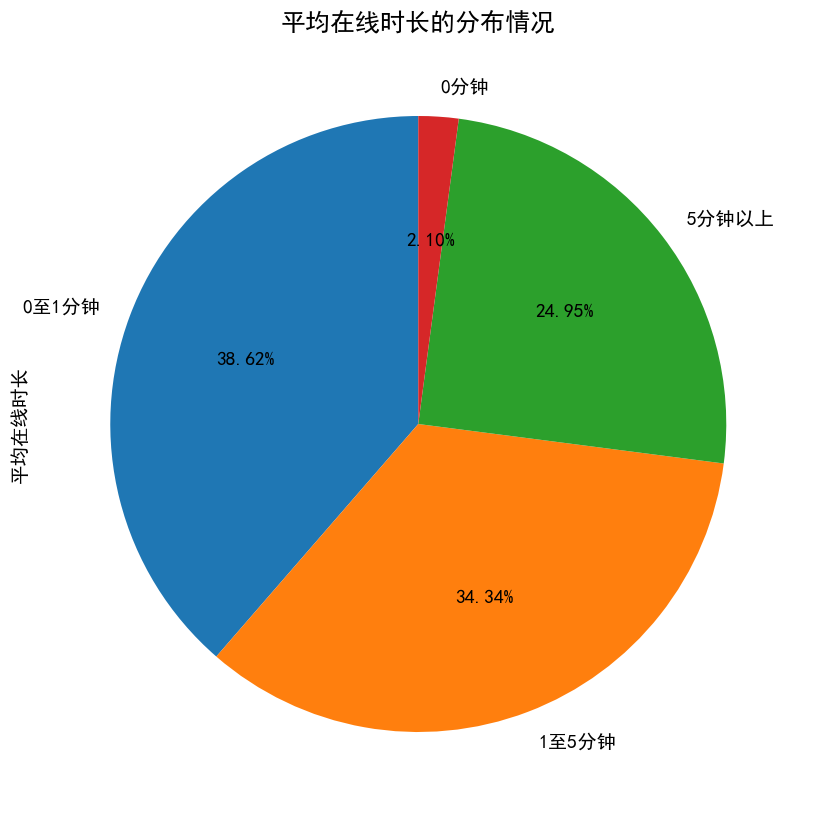

In [16]:
# 留存用户的分钟数组成：饼图
retention_level = pd.cut(x=full['avg_online_minutes'], bins=[-0.01, 0, 1, 5, np.inf])
retention_counts = retention_level.value_counts() #统计每个分箱的用户数量
retention_level2 = retention_counts[0:5]  #使用前4种占比大的结果来画图。
print(retention_level2)
bin_labels = {
    pd.Interval(-0.01, 0.0, closed='right'): '0分钟',
    pd.Interval(0.0, 1.0, closed='right'): '0至1分钟',
    pd.Interval(1.0, 5.0, closed='right'): '1至5分钟',
    pd.Interval(5.0, np.inf, closed='right'): '5分钟以上'
}
mapped_index = [bin_labels.get(interval, str(interval)) for interval in retention_level2.index]
retention_level2.index = mapped_index
print(retention_level2)
fig = plt.figure(figsize=(10, 10))
retention_level2.plot(kind='pie', fontsize=14, autopct='%1.2f%%', startangle=90) # autopct显示百分比

plt.ylabel('平均在线时长', fontsize=14)
plt.title('平均在线时长的分布情况', fontsize=18)
plt.show()

# Revenue

In [20]:
# 付费情况
revenue = full.loc[full['pay_price'] > 0, 'pay_price'].sum()
paid_user_count = (full['pay_price'] > 0).astype('int').sum()
pr = paid_user_count / retention_count
arpu = revenue / retention_count
arppu = revenue / paid_user_count
print(f"付费人数为：{paid_user_count}\n付费率为：{pr.round(2)}\n每用户的平均收入为：{arpu.round(2)}\n每付费用户的平均收入分别是：{arppu.round(2)}")

付费人数为：19549
付费率为：0.02
每用户的平均收入为：0.69
每付费用户的平均收入分别是：28.49


付费用户      19549
非付费用户    791972
dtype: int64


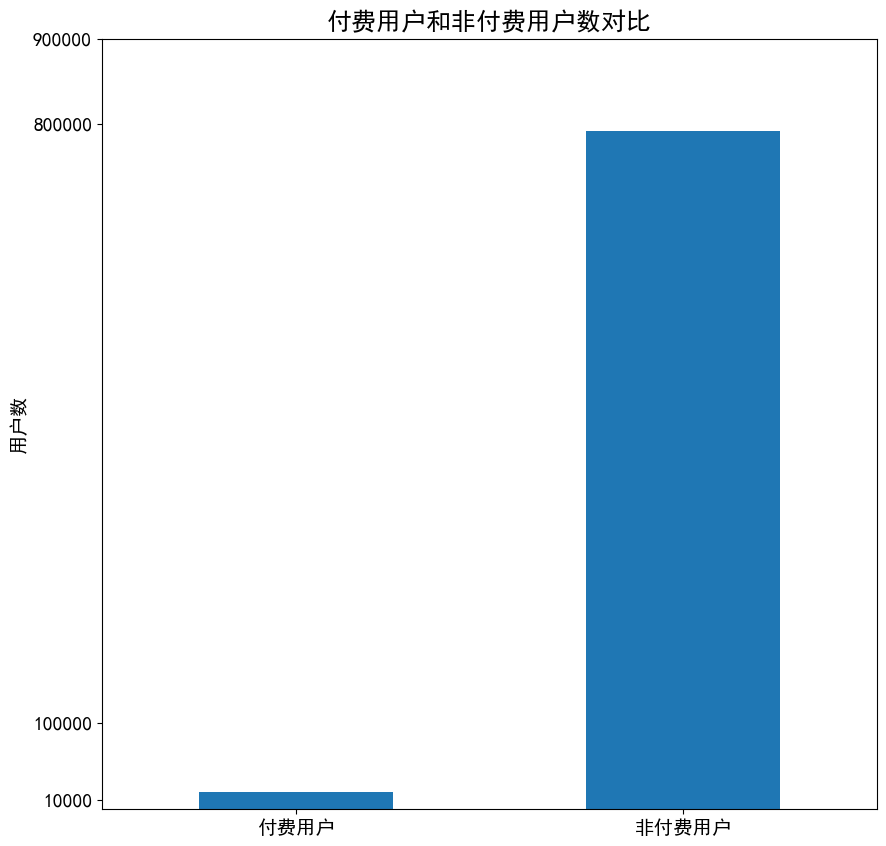

In [46]:
# ARPU消费对比图，使用柱状图
paid_user = pd.Series([paid_user_count, retention_count-paid_user_count], index=['付费用户', '非付费用户'])
print(paid_user)
fig = plt.figure(figsize=(10, 10))
bars = paid_user.plot(kind='bar',fontsize=14)
plt.title('付费用户和非付费用户数对比',fontsize=18)
plt.xticks(rotation=0)
plt.yticks(ticks=[10000, 100000, 800000, 900000])
plt.ylabel('用户数',fontsize=14)
plt.show()

# 用户习惯

In [45]:
# PVP和PVE对战平均数
pvp_counts = full['pvp_battle_count'].mean()
print(f'PVP对战次数均值：\n{pvp_counts}')
pvp_lanch_counts = full['pvp_lanch_count'].mean()
print(f'主动发起PVP对战次数均值：\n{pvp_lanch_counts}')
pve_counts = full['pve_battle_count'].mean()
print(f'PVE对战次数均值：\n{pve_counts}')
pve_lanch_counts = full['pve_lanch_count'].mean()
print(f'主动发起PVE对战次数均值：\n{pve_lanch_counts}')

PVP对战次数均值：
2.4654785543843056
主动发起PVP对战次数均值：
1.2582449266165943
PVE对战次数均值：
4.047160570081575
主动发起PVE对战次数均值：
4.033594954483711


            pvp_battle_count  pvp_lanch_count  pvp_win_count  \
paid_users                                                     
free_user           1.941385         0.910721       0.712464   
paid_user          24.164459        15.646734      16.396593   

            pve_battle_count  pve_lanch_count  pve_win_count  
paid_users                                                    
free_user           3.044685         3.035541       2.750517  
paid_user          45.552560        45.355926      41.491483  


<Figure size 1000x1000 with 0 Axes>

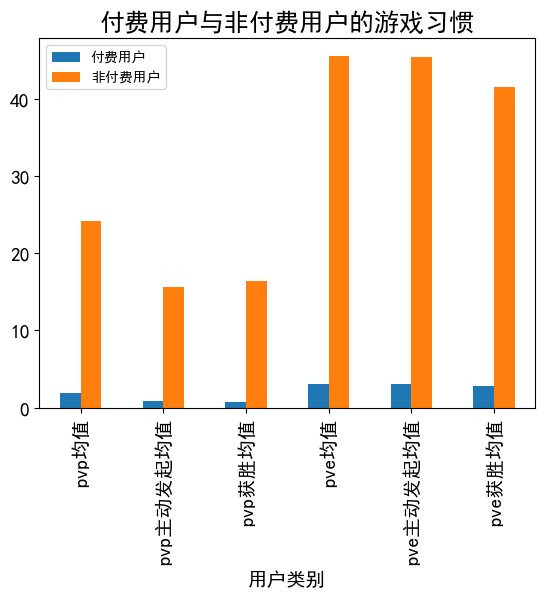

In [75]:
# 分用户查看习惯
full['paid_users'] = full['pay_price'].apply(lambda x:'paid_user' if x>0 else 'free_user')
habits_diff = full.groupby(by='paid_users')[['pvp_battle_count','pvp_lanch_count','pvp_win_count','pve_battle_count','pve_lanch_count','pve_win_count']].mean()
print(habits_diff)

fig = plt.figure(figsize=(10, 10))
habits_diff.T.plot(kind='bar', fontsize=14)
plt.title('付费用户与非付费用户的游戏习惯',fontsize=18)
plt.xlabel('用户类别', fontsize=14)
_ = plt.xticks([0,1,2,3,4,5],
           ['pvp均值','pvp主动发起均值','pvp获胜均值','pve均值','pve主动发起均值','pve获胜均值'])
plt.legend(['付费用户','非付费用户'])
plt.show()